In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from common import Fonts, Images

In [3]:
df = pd.read_csv("data/2022_combos.csv")
df

,p1,p2,combos,p1g,p1a,p2g,p2a,p1g_p2a,p2g_p1a,goals
0,Diana Ordóñez,Carson Pickett,4,11,0,1,6,4,0,12
1,Alex Morgan,Taylor Kornieck,3,15,2,3,3,3,0,18
2,Debinha,Kerolin,3,12,4,6,4,2,1,18
3,Sophia Smith,Olivia Lynn Moultrie,3,14,3,3,4,2,1,17
4,Mallory Pugh,Yuki Nagasato,3,11,6,3,3,1,2,14
...,...,...,...,...,...,...,...,...,...,...
191,Brianna Pinto,Ryan Williams,1,1,2,0,3,1,0,1
192,Jodie Taylor,Katie Johnson,1,1,0,0,3,1,0,1
193,Joelle Anderson,Cali Jean Farquharson,1,1,0,0,1,1,0,1
194,Kaleigh Riehl,Kelsey Turnbow,1,1,0,0,2,1,0,1


In [4]:
# Constants
GOAL_COLOR = "#5c3c92"
ASSIST_COLOR = "#077b8a"

H = 0.3
GAP = 0.1
FONT_SIZE = 24

COMBO_GOALS_STYLE = {"ec": GOAL_COLOR, "fc": GOAL_COLOR, "alpha": 1}
COMBO_ASSISTS_STYLE = {"ec": ASSIST_COLOR, "fc": ASSIST_COLOR, "alpha": 1}
GOALS_STYLE = {"ec": GOAL_COLOR, "fc": GOAL_COLOR, "alpha" : 0.65}
ASSISTS_STYLE = {"ec": ASSIST_COLOR, "fc": ASSIST_COLOR, "alpha" : 0.65}

<Figure size 1008x1008 with 0 Axes>

<Figure size 16800x16800 with 0 Axes>

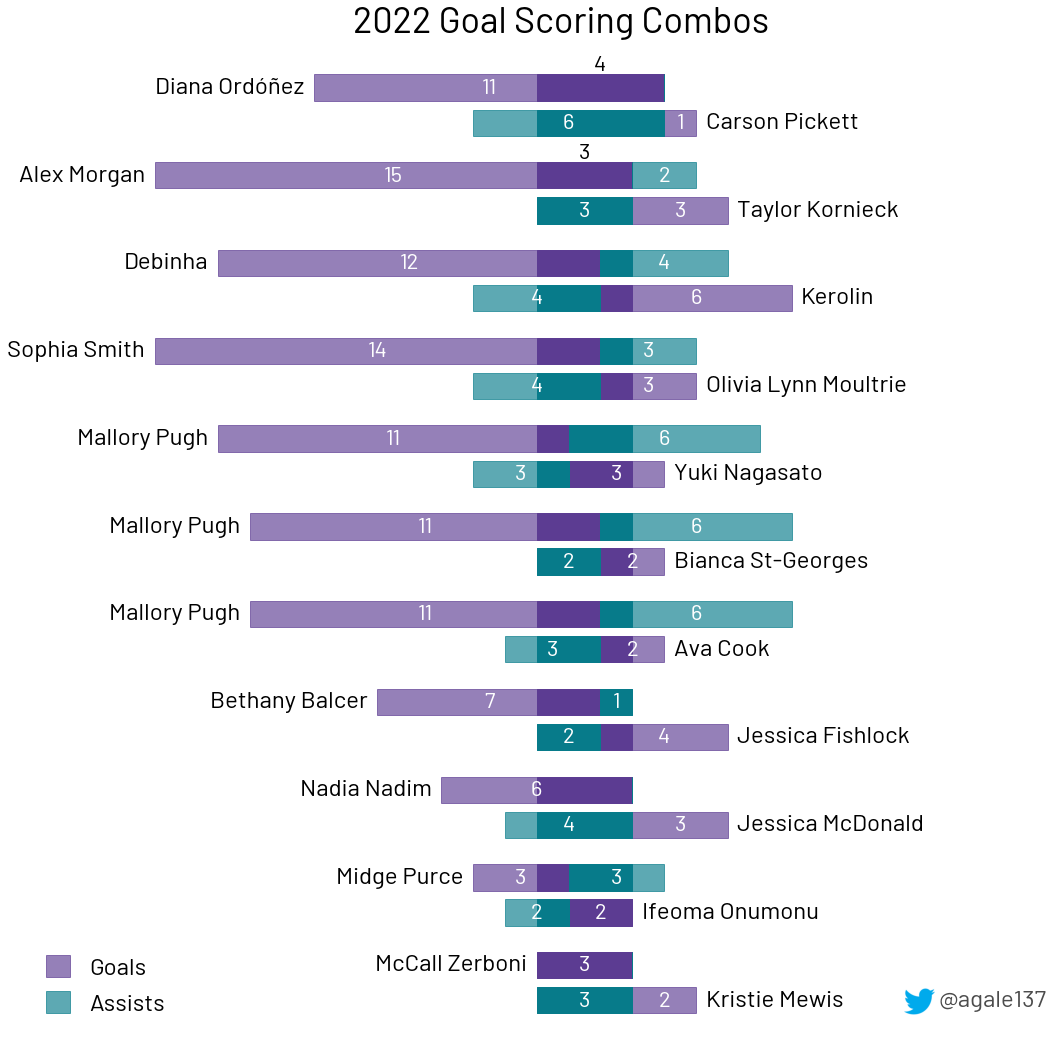

In [8]:
# Draw the plot
plt.clf()
plt.rcParams["figure.figsize"] = (14, 14)
plt.figure(dpi=1200, facecolor="white")
fig, ax = plt.subplots()
fig.tight_layout()
fig.patch.set_facecolor("white")
fig.gca().invert_yaxis()

# Axes
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.set_xticks([])
ax.set_yticks([])
plt.xlim([-14, 16])
plt.ylim([11, 0])

# Title
fig.suptitle(
    "2022 Goal Scoring Combos",
    color="black",
    fontsize=36,
    fontproperties=Fonts.BARLOW,
    y=1.02,
    va="bottom",
)

for i, row in df[0:11].iterrows():
    # p1 goals
    ax.add_patch(
        Rectangle((row["p1g_p2a"] - row["p1g"], i), row["p1g"], H, **GOALS_STYLE)
    )
    plt.text(
        row["p1g_p2a"] - row["p1g"] / 2,
        i + H / 2,
        row["p1g"],
        color="white",
        fontsize=FONT_SIZE - 2,
        fontproperties=Fonts.BARLOW,
        va="center",
        ha="center",
    )
    # p1 assists
    ax.add_patch(Rectangle((row["p1g_p2a"], i), row["p1a"], H, **ASSISTS_STYLE))
    if row["p1a"] > 0:
        plt.text(
            row["p1g_p2a"] + row["p1a"] / 2,
            i + H / 2,
            row["p1a"],
            color="white",
            fontsize=FONT_SIZE - 2,
            fontproperties=Fonts.BARLOW,
            va="center",
            ha="center",
        )
    # p1 combos
    ax.add_patch(Rectangle((0, i), row["p1g_p2a"], H, **COMBO_GOALS_STYLE))
    ax.add_patch(
        Rectangle((row["p1g_p2a"], i), row["p2g_p1a"], H, **COMBO_ASSISTS_STYLE)
    )
    if i in [0, 1]:
        plt.text(
            (row["p1g_p2a"] + row["p2g_p1a"]) / 2,
            i,
            row["p1g_p2a"] + row["p2g_p1a"],
            color="black",
            fontsize=FONT_SIZE - 2,
            fontproperties=Fonts.BARLOW,
            va="bottom",
            ha="center",
        )
    # p1 name
    plt.text(
        row["p1g_p2a"] - row["p1g"] - H,
        i + H / 2,
        row["p1"],
        color="black",
        fontsize=FONT_SIZE,
        fontproperties=Fonts.BARLOW,
        ha="right",
        va="center",
    )

    # p2 goals
    ax.add_patch(Rectangle((row["p1g_p2a"], i + H + GAP), row["p2g"], H, **GOALS_STYLE))
    plt.text(
        row["p1g_p2a"] + row["p2g"] / 2,
        i + H * 3 / 2 + GAP,
        row["p2g"],
        color="white",
        fontsize=FONT_SIZE - 2,
        fontproperties=Fonts.BARLOW,
        va="center",
        ha="center",
    )
    # p2 assists
    ax.add_patch(
        Rectangle(
            (row["p1g_p2a"] - row["p2a"], i + H + GAP), row["p2a"], H, **ASSISTS_STYLE
        )
    )
    if row["p2a"] > 0:
        plt.text(
            row["p1g_p2a"] - row["p2a"] / 2,
            i + H * 3 / 2 + GAP,
            row["p2a"],
            color="white",
            fontsize=FONT_SIZE - 2,
            fontproperties=Fonts.BARLOW,
            va="center",
            ha="center",
        )
    # p2 combos
    ax.add_patch(
        Rectangle((row["p1g_p2a"], i + H + GAP), row["p2g_p1a"], H, **COMBO_GOALS_STYLE)
    )
    ax.add_patch(Rectangle((0, i + H + GAP), row["p1g_p2a"], H, **COMBO_ASSISTS_STYLE))
    # p2 name
    plt.text(
        row["p1g_p2a"] + row["p2g"] + H,
        i + H * 3 / 2 + GAP,
        row["p2"],
        color="black",
        fontsize=FONT_SIZE,
        fontproperties=Fonts.BARLOW,
        ha="left",
        va="center",
    )

# Legend
fp = Fonts.BARLOW
fp.set_size(24)
ax.legend(
    ["Goals", "Assists"],
    bbox_to_anchor=(0.1, 0.11),
    prop=fp,
    handlelength=1,
    handleheight=1,
    frameon=False,
)

# Twitter logo and username
plt.text(
    1,
    0.04,
    "@agale137",
    transform=ax.transAxes,
    color="black",
    fontsize=24,
    alpha=0.7,
    fontproperties=Fonts.BARLOW,
    va="center",
    ha="right",
)
newax = fig.add_axes([0.84, 0.05, 0.03, 0.03], anchor="SE", zorder=1)
newax.imshow(Images.TWITTER)
newax.axis("off")

# Save image
plt.savefig("images/2022_combos.png", bbox_inches="tight", pad_inches=0.5)